<a href="https://colab.research.google.com/github/Sandeep-Bansal1/reviews/blob/main/reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [4]:
df = pd.read_csv('/content/grouped_comments_with_ratings.csv', encoding='latin-1')


In [231]:
df.head()

,Trip Name,Comment Question Verbatim (On Worksheet),Rating
0,"A Remarkable Journey to Alaska, British Columb...","The ship, the naturalists, the stewards were e...",4.333333
1,"A Voyage From Singapore To Bali: Jungles, Atol...","Great ship, great hotel (Tilen and team top no...",2.000000
2,"A Voyage on the Hudson River: Fall Colors, Con...",Many things: having multiple options for diffe...,4.588235
3,"A Voyage through Melanesia: New Guinea, Sepik ...",the expedition staff on the ship,2.000000
4,A Voyage to Fiji and Tahiti: Vibrant Reefs and...,staff was very well informed. diving experienc...,3.666667


In [8]:
test = df.drop(['Trip Name','Rating'],axis = 1)

In [9]:
train = pd.read_csv('/content/grouped_comments_with_ratings.csv', encoding='latin-1')


In [10]:
df["Rating"] = pd.to_numeric(df["Rating"])


In [11]:
df1 = df.replace(1, 0, regex = True)
df2 = df1.replace(2, 0, regex = True)
df3 = df2.replace(3, 0, regex = True)
df4 = df3.replace(4, 1, regex = True)
df5 = df4.replace(5, 1, regex = True)


In [12]:
df5.rename(columns={'Rating': 'label', 'Review_ID': 'id' }).head(2)


,Trip Name,Comment Question Verbatim (On Worksheet),label
0,"A Remarkable Journey to Alaska, British Columb...","The ship, the naturalists, the stewards were e...",4.333333
1,"A Voyage From Singapore To Bali: Jungles, Atol...","Great ship, great hotel (Tilen and team top no...",0.000000


In [13]:
train = df5.drop(['Trip Name'],axis = 1)

In [14]:
train.head(10)


,Comment Question Verbatim (On Worksheet),Rating
0,"The ship, the naturalists, the stewards were e...",4.333333
1,"Great ship, great hotel (Tilen and team top no...",0.000000
2,Many things: having multiple options for diffe...,4.588235
3,the expedition staff on the ship,0.000000
4,staff was very well informed. diving experienc...,3.666667
5,"As usual, the Naturalist on this trip were so ...",4.533333
6,The guides were very knowledgable and fun to s...,4.166667
7,I loved the knowledge and enthusiasm of all th...,3.866667
8,Flexibility when viewing wildlife. All of the ...,4.722689
9,"Choice of Acti vities was varied,specifically ...",1.000000


In [16]:
combine = pd.concat([test,train],ignore_index=True)

In [17]:
combine.head()


,Comment Question Verbatim (On Worksheet),Rating
0,"The ship, the naturalists, the stewards were e...",NaN
1,"Great ship, great hotel (Tilen and team top no...",NaN
2,Many things: having multiple options for diffe...,NaN
3,the expedition staff on the ship,NaN
4,staff was very well informed. diving experienc...,NaN


In [18]:
combine.tail()


,Comment Question Verbatim (On Worksheet),Rating
165,The Peru experience completely surpassed expec...,4.885714
166,loved the chef and the service on board Island...,4.858974
167,"All of the expedition crew, hotel staff and sh...",4.833333
168,"lodgings, guides, itinerary Staff on riverboat...",4.250000
169,The staff in all departments.,1.000000


In [20]:
combine['tidy_review'] = combine['Comment Question Verbatim (On Worksheet)'].str.replace("[^a-zA-Z#]", " ")
combine.head(10)


,Comment Question Verbatim (On Worksheet),Rating,tidy_review
0,"The ship, the naturalists, the stewards were e...",NaN,"The ship, the naturalists, the stewards were e..."
1,"Great ship, great hotel (Tilen and team top no...",NaN,"Great ship, great hotel (Tilen and team top no..."
2,Many things: having multiple options for diffe...,NaN,Many things: having multiple options for diffe...
3,the expedition staff on the ship,NaN,the expedition staff on the ship
4,staff was very well informed. diving experienc...,NaN,staff was very well informed. diving experienc...
5,"As usual, the Naturalist on this trip were so ...",NaN,"As usual, the Naturalist on this trip were so ..."
6,The guides were very knowledgable and fun to s...,NaN,The guides were very knowledgable and fun to s...
7,I loved the knowledge and enthusiasm of all th...,NaN,I loved the knowledge and enthusiasm of all th...
8,Flexibility when viewing wildlife. All of the ...,NaN,Flexibility when viewing wildlife. All of the ...
9,"Choice of Acti vities was varied,specifically ...",NaN,"Choice of Acti vities was varied,specifically ..."


In [21]:
combine['tidy_review'] = combine['tidy_review'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))


In [22]:
combine.head(10)


,Comment Question Verbatim (On Worksheet),Rating,tidy_review
0,"The ship, the naturalists, the stewards were e...",NaN,"ship, naturalists, stewards were excellent, fl..."
1,"Great ship, great hotel (Tilen and team top no...",NaN,"Great ship, great hotel (Tilen team notch). SU..."
2,Many things: having multiple options for diffe...,NaN,Many things: having multiple options different...
3,the expedition staff on the ship,NaN,expedition staff ship
4,staff was very well informed. diving experienc...,NaN,staff very well informed. diving experience gr...
5,"As usual, the Naturalist on this trip were so ...",NaN,"usual, Naturalist this trip were smart, approa..."
6,The guides were very knowledgable and fun to s...,NaN,guides were very knowledgable spend time with....
7,I loved the knowledge and enthusiasm of all th...,NaN,loved knowledge enthusiasm naturalists. trip l...
8,Flexibility when viewing wildlife. All of the ...,NaN,Flexibility when viewing wildlife. staff were ...
9,"Choice of Acti vities was varied,specifically ...",NaN,"Choice Acti vities varied,specifically what wa..."


In [23]:
tokenized_review = combine['tidy_review'].apply(lambda x: x.split())

tokenized_review.head()

,tidy_review
0,"[ship,, naturalists,, stewards, were, excellent,, flexibility, with, schedules, meet, unexpected, difficulties,, expedition, leader, excellent, communication, each, event., went, wonderful, places,, guides, were, outstanding, boat, great,, food, good,, .Staff, went, their, helpful, Knowledgeable, naturalists, Expertise, naturalists;, small, ship;, excellent, activities;, good, food;, time, with, Haida, gwai;, comfortable, cabin, Wonderful,, friendly, knowledgeable, staff., Great, food, happy, hour., Excellent, shore, excursions, that, taught, great, deal., Marvelous, scenery., Hassle, free,, well, constructed, trip., opportunities, exploration, were, taken, whenever, they, presented, themselves, Lectures, presentations., Itinerary., Access, naturalists, other, experts., This, trip, ""tour"",, exceptional, experience., experts,, their, on-board, talks, observations, while, were, land, enhanced, carefully, curated, ...]"
1,"[Great, ship,, great, hotel, (Tilen, team, notch)., SUPERB, chef., Passengers, were, great., Entire, staff, extremely, kind,, well-trained., naturalists, subject, matter, experts, were, great...and, Ritchie, gem., Unfortunately,, expedition, leader, nowhere, near, good, effective, rest, team.]"
2,"[Many, things:, having, multiple, options, different, physical, abilities,, thoughtful, organization, activities-, something, everyone,, Sean, enthusiastic, knowledgable, leader, program, staff, equally, enthusiastic, capable,, quiet, attention, safety, made, able, encourage, year, father/father-in-law, take, whatever, activity, interested, food, excellent:, varied, many, options.The, non-programmatic, staff, were, friendly,, extremely, competent., different, activities., Hiking,, kayaking,, farm, visits, events., poetry, reading, very, good., loved, opportunity, places, learn, about, them., activities, planned, organizers, trip, were, outstanding, very, diverse., staff, excellent, service, accommodating, needs., Hotel, Manager,, Linda,, ship, like, star, hotel., fall, colors,, learning, history, area,, kayaking,, hiking, (especially, longer, hikes),, staff, knowledge, willingness, share, their, knowledge, their, sense, ...]"
3,"[expedition, staff, ship]"
4,"[staff, very, well, informed., diving, experience, great.The, Orion, wonderful, ship, Went, some, amazing, places, some, great, people, board, Tua,, kura,, matahi, ebony, provided, much, cultural, information., They, were, great, ship, fantastic., Fran, hotel, staff, captain, crew, were, wonderful., food, cabin, were, superb.]"


In [24]:
from nltk import PorterStemmer

ps = PorterStemmer()

tokenized_review = tokenized_review.apply(lambda x: [ps.stem(i) for i in x])

tokenized_review.head()

,tidy_review
0,"[ship,, naturalists,, steward, were, excellent,, flexibl, with, schedul, meet, unexpect, difficulties,, expedit, leader, excel, commun, each, event., went, wonder, places,, guid, were, outstand, boat, great,, food, good,, .staff, went, their, help, knowledg, naturalist, expertis, naturalists;, small, ship;, excel, activities;, good, food;, time, with, haida, gwai;, comfort, cabin, wonderful,, friendli, knowledg, staff., great, food, happi, hour., excel, shore, excurs, that, taught, great, deal., marvel, scenery., hassl, free,, well, construct, trip., opportun, explor, were, taken, whenev, they, present, themselv, lectur, presentations., itinerary., access, naturalist, other, experts., thi, trip, ""tour"",, except, experience., experts,, their, on-board, talk, observ, while, were, land, enhanc, care, curat, ...]"
1,"[great, ship,, great, hotel, (tilen, team, notch)., superb, chef., passeng, were, great., entir, staff, extrem, kind,, well-trained., naturalist, subject, matter, expert, were, great...and, ritchi, gem., unfortunately,, expedit, leader, nowher, near, good, effect, rest, team.]"
2,"[mani, things:, have, multipl, option, differ, physic, abilities,, thought, organ, activities-, someth, everyone,, sean, enthusiast, knowledg, leader, program, staff, equal, enthusiast, capable,, quiet, attent, safeti, made, abl, encourag, year, father/father-in-law, take, whatev, activ, interest, food, excellent:, vari, mani, options.th, non-programmat, staff, were, friendly,, extrem, competent., differ, activities., hiking,, kayaking,, farm, visit, events., poetri, read, veri, good., love, opportun, place, learn, about, them., activ, plan, organ, trip, were, outstand, veri, diverse., staff, excel, servic, accommod, needs., hotel, manager,, linda,, ship, like, star, hotel., fall, colors,, learn, histori, area,, kayaking,, hike, (especi, longer, hikes),, staff, knowledg, willing, share, their, knowledg, their, sens, ...]"
3,"[expedit, staff, ship]"
4,"[staff, veri, well, informed., dive, experi, great.th, orion, wonder, ship, went, some, amaz, place, some, great, peopl, board, tua,, kura,, matahi, eboni, provid, much, cultur, information., they, were, great, ship, fantastic., fran, hotel, staff, captain, crew, were, wonderful., food, cabin, were, superb.]"


In [25]:
for i in range(len(tokenized_review)):
    tokenized_review[i] = ' '.join(tokenized_review[i])

combine['tidy_review'] = tokenized_review
combine.head()

,Comment Question Verbatim (On Worksheet),Rating,tidy_review
0,"The ship, the naturalists, the stewards were e...",NaN,"ship, naturalists, steward were excellent, fle..."
1,"Great ship, great hotel (Tilen and team top no...",NaN,"great ship, great hotel (tilen team notch). su..."
2,Many things: having multiple options for diffe...,NaN,mani things: have multipl option differ physic...
3,the expedition staff on the ship,NaN,expedit staff ship
4,staff was very well informed. diving experienc...,NaN,staff veri well informed. dive experi great.th...


In [27]:
from sklearn.feature_extraction.text import CountVectorizer

bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')

# bag-of-words feature matrix
bow = bow_vectorizer.fit_transform(combine['tidy_review'])

df_bow = pd.DataFrame(bow.todense())

df_bow

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0,0,0,0,0,0,0,0,1,0,...,0,0,1,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,2,0,1,0,0,0,...,0,0,0,1,0,0,2,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,0,0,0,1,1,0,0,1,0,0,...,0,0,3,1,0,0,0,0,0,1
166,0,0,1,1,2,2,0,2,0,1,...,1,0,7,4,3,0,2,0,2,1
167,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
168,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [31]:
train_bow = bow[:85]

train_bow.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 1, 0],
        ...,
        [0, 0, 0, ..., 1, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [40]:
from sklearn.model_selection import train_test_split

x_train_bow,x_valid_bow,y_train_bow,y_valid_bow = train_test_split(train_bow,train['Rating'],test_size=0.3,random_state=2)


In [33]:
from sklearn.linear_model import LogisticRegression
Log_Reg = LogisticRegression(random_state=0,solver='lbfgs')

In [210]:
model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)


In [211]:
model = RandomForestRegressor()
model.fit(x_train_bow, y_train_bow)

RandomForestRegressor()

In [212]:
y_pred = model.predict(x_valid_bow)


In [213]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_valid_bow, y_pred)

# Mean Squared Error (MSE)
mse = mean_squared_error(y_valid_bow, y_pred)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# R² Score
r2 = r2_score(y_valid_bow, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")


MAE: 1.171600133718383
MSE: 1.974786877197571
RMSE: 1.4052711045195412
R² Score: 0.45459618584968686


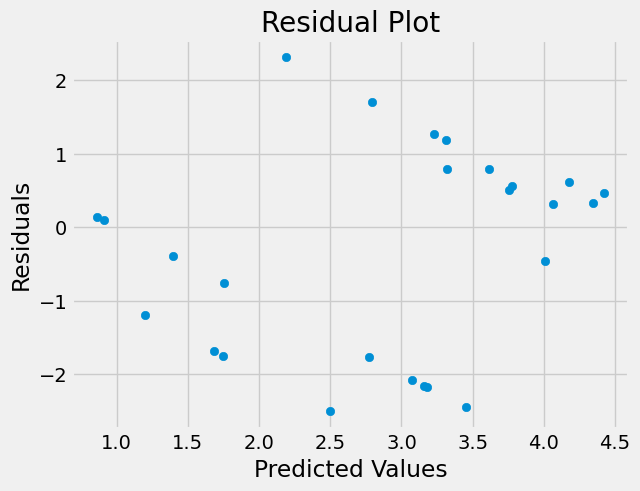

In [214]:
import matplotlib.pyplot as plt

residuals = y_valid_bow - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

In [215]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Example of converting continuous target to categorical (e.g., binning)
# This is just an example, adjust according to your specific case
bins = np.linspace(min(y_train_bow), max(y_train_bow), 3)  # Adjust the number of bins as needed
y_train_binned = np.digitize(y_train_bow, bins) - 1  # Convert to categorical labels
y_test_binned = np.digitize(y_valid_bow, bins) - 1

# Fit a classifier instead of a regressor
model = RandomForestClassifier()
model.fit(x_train_bow, y_train_binned)

# Make predictions on the test set
y_pred_binned = model.predict(x_valid_bow)

# Calculate classification metrics
accuracy = accuracy_score(y_test_binned, y_pred_binned)
precision = precision_score(y_test_binned, y_pred_binned, average='weighted')
recall = recall_score(y_test_binned, y_pred_binned, average='weighted')
f1 = f1_score(y_test_binned, y_pred_binned, average='weighted')


In [216]:
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.7307692307692307
Precision: 0.7708333333333333
Recall: 0.7307692307692307
F1 Score: 0.7204301075268819


In [222]:
import joblib

# Load the vectorizer and the trained Random Forest model
vectorizer = joblib.load('tfidf_vectorizer.pkl')
model = joblib.load('tfidf_vectorizer.pkl')


In [228]:
# Unseen text data
unseen_text_data = ["awesome!"]

# Transform the unseen text data using the vectorizer
X_unseen = vectorizer.transform(unseen_text_data)


In [229]:
# Predict the rating using the trained Random Forest model
final_rating = round(predicted_rating[0])

# If your model is a classifier, it already returns an integer rating
print(f"The predicted rating for the unseen review is: {final_rating}")

The predicted rating for the unseen review is: 1


In [234]:
dataframe = pd.read_csv('/content/segmented_trips_by_location_final.csv')

In [235]:
# saving the dataframe
dataframe.to_csv('dataframe.csv')


In [236]:
dataframe

,Trip Name,Comment Question Verbatim (On Worksheet),Rating,Location
0,"A Remarkable Journey to Alaska, British Columb...","The ship, the naturalists, the stewards were e...",4.333333,North America
1,"A Voyage From Singapore To Bali: Jungles, Atol...","Great ship, great hotel (Tilen and team top no...",2.000000,Other
2,"A Voyage on the Hudson River: Fall Colors, Con...",Many things: having multiple options for diffe...,4.588235,Other
3,"A Voyage through Melanesia: New Guinea, Sepik ...",the expedition staff on the ship,2.000000,Other
4,A Voyage to Fiji and Tahiti: Vibrant Reefs and...,staff was very well informed. diving experienc...,3.666667,Other
5,A Voyage to Iceland's Wild West Coast and East...,"As usual, the Naturalist on this trip were so ...",4.533333,Europe
6,A Voyage to Panama and Colombia: Exploring the...,The guides were very knowledgable and fun to s...,4.166667,South America
7,A Voyage to the Bahamas' Out Islands: Natural ...,I loved the knowledge and enthusiasm of all th...,3.866667,Other
8,Alaska's Inside Passage,Flexibility when viewing wildlife. All of the ...,4.722689,North America
9,"Ancient Isles: England, Ireland, and Scotland","Choice of Acti vities was varied,specifically ...",4.000000,Europe


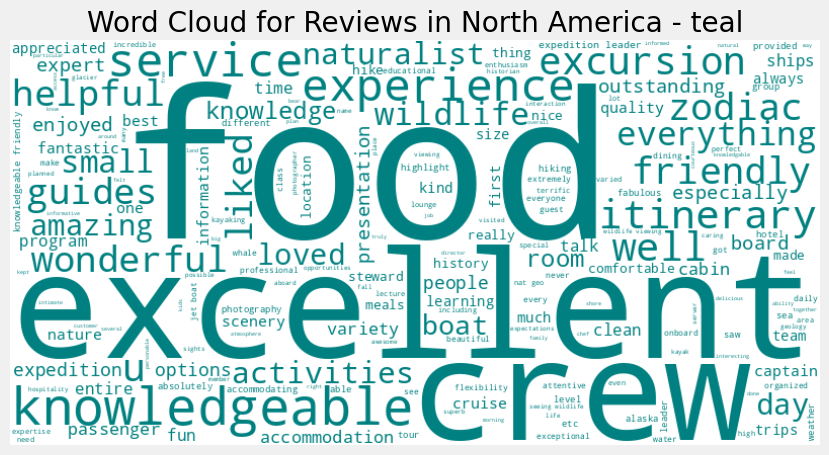

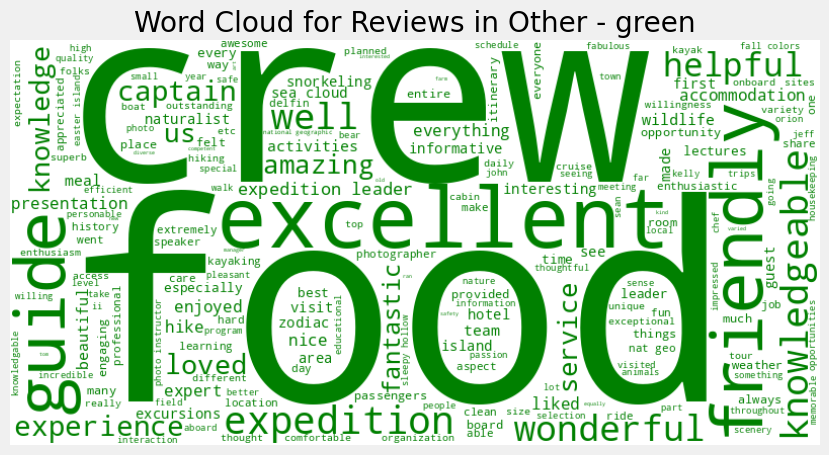

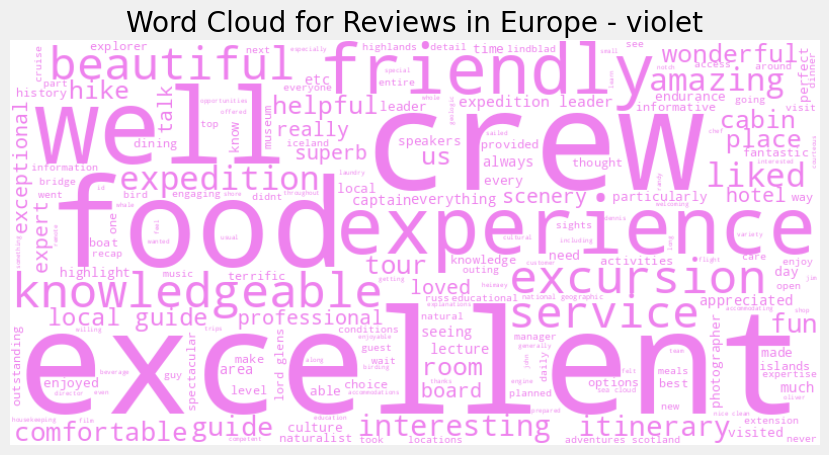

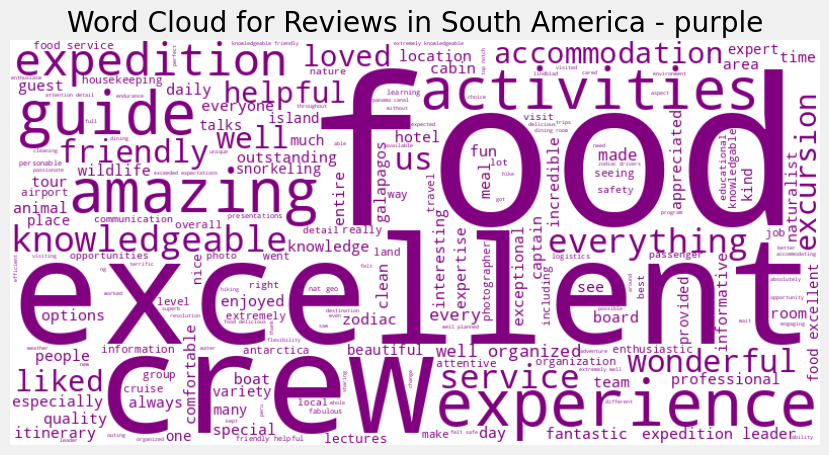

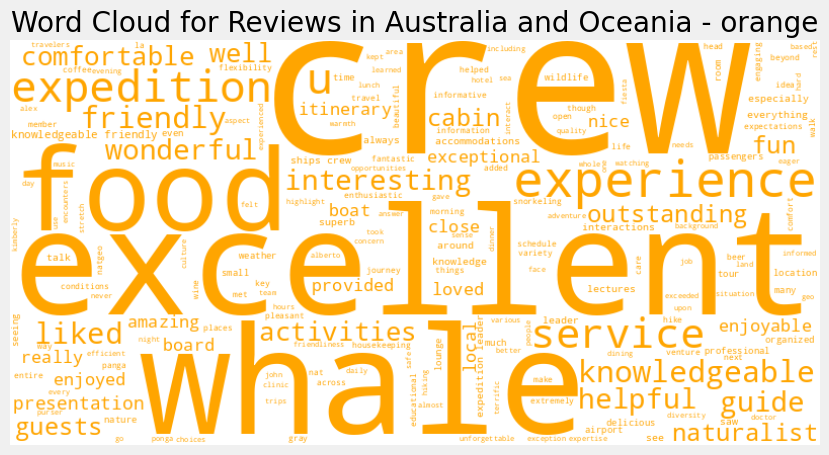

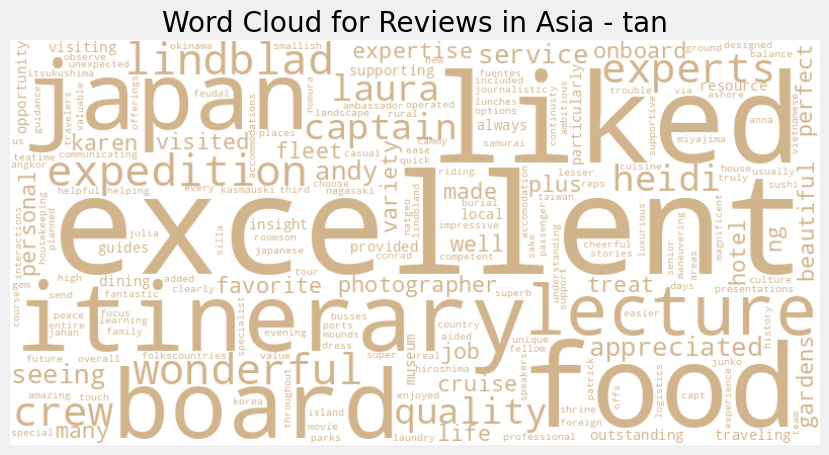

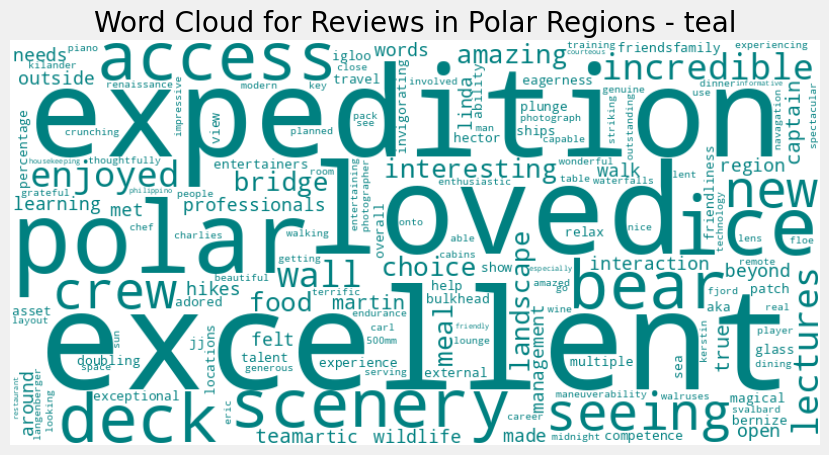

In [253]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re

# Define a basic set of stopwords manually
basic_stopwords = set([
    'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",
    "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his',
    'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself',
    'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this',
    'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been',
    'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the',
    'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for',
    'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',
    'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
    'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all',
    'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not',
    'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just',
    'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain',
    'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',
    "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't",
    'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
    "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't",'staff','ship','trip',
    'naturalists','great','good'
])

# Preprocess the text with the basic stopwords
def preprocess_text_basic(text):
    text = re.sub(r'[^\w\s]', '', text.lower())
    return ' '.join([word for word in text.split() if word not in basic_stopwords])

# Apply preprocessing to the comments
dataframe['cleaned_comment'] = dataframe['Comment Question Verbatim (On Worksheet)'].apply(preprocess_text_basic)

# Generate a word cloud for each location
colors = ['teal', 'green', 'violet', 'purple', 'orange', 'tan']

# Generate a word cloud for each location with corresponding mask and different colors
for idx, location in enumerate(locations):
    location_comments = ' '.join(dataframe[dataframe['Location'] == location]['cleaned_comment'])

    # Choose a color from the list, cycling through
    color = colors[idx % len(colors)]

    wordcloud = WordCloud(width=800, height=400, background_color='white', contour_color=color, contour_width=3).generate(location_comments)

    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud.recolor(color_func=lambda *args, **kwargs: color), interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for Reviews in {location} - {color}")
    plt.show()